In [1]:
import pandas as pd
import numpy as np
import h5py
#import illustris_python as il
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib widget
from tqdm import tqdm_notebook
#import skysurvey_pw as skysurvey
import skysurvey
import requests
import glob
import os

import h5py
from astropy.cosmology import Planck15 as cosmo

from photutils.aperture import CircularAperture,aperture_photometry
from astropy.wcs import WCS
from astropy.visualization import simple_norm
from astropy.io import fits

import warnings
from tqdm.notebook import tqdm

import pandas as pd
from pandas.errors import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

def convert_phot(aperture_sum,zp):
    return -2.5*np.log10(aperture_sum) + zp
def convert_phot_fnu(aperture_sum,zp):
    return 10**(np.log10(aperture_sum)-0.4*(zp-8.9))
    
def do_ap_phot(img_path,snx=0,sny=0,pix_list=None,pos_list=None,zp=0,ax=None,band=0,plot_colour='w',plot=False):
    #zp does not matter if we are just doing colours.
    img = fits.getdata(img_path)[band]
    h = fits.getheader(img_path)
    #wgt = 1/np.var(img)
    #print(img.shape,wgt.shape)
    #wcs = WCS(h)
    # First do the inner apperture with DLR <1
    if not pix_list:
        pix_list=[snx,sny]
         
    if not pos_list:
        pos_list=[snx,sny]
    pixscale_physical = 1000/h['CDELT1']/cosmo.h
    ap = CircularAperture(pix_list,r=pixscale_physical)
    phot_df = aperture_photometry(img, ap,error=0.1*img).to_pandas()
    
    res =convert_phot(phot_df['aperture_sum'],zp)
    #res_fnu =convert_phot_fnu(phot_df['aperture_sum'],zp)
    res_err = convert_phot(phot_df['aperture_sum_err'],zp)
    if plot:
        plot_ap =  CircularAperture(pos_list,r=1)
        ##ap.positions = 
        plot_ap.plot(ax=ax,alpha=0.15,color=plot_colour)
    return ap,res, res_err

In [2]:
sim = 'TNG50-1'

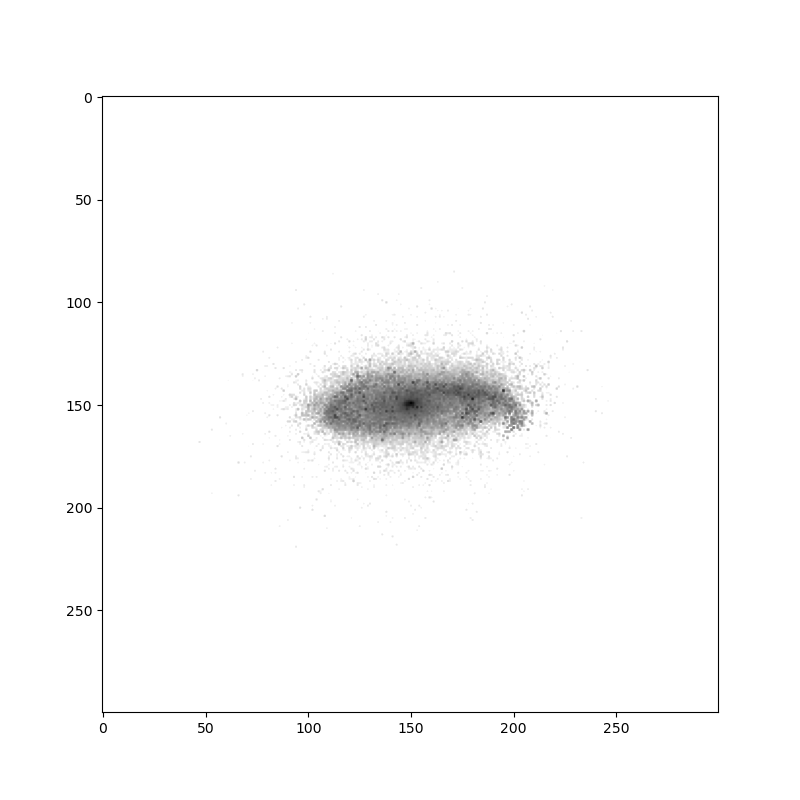

In [23]:
f,ax=plt.subplots(figsize=(8,8))
with fits.open(f'data/{sim}/iManga/98_507204.fits') as hdul:
    white_light = np.nansum(hdul[0].data,axis=(0))
    randomspec = hdul[0].data[:,149,149]
    ax.imshow(white_light,cmap='Greys',norm='log')
    

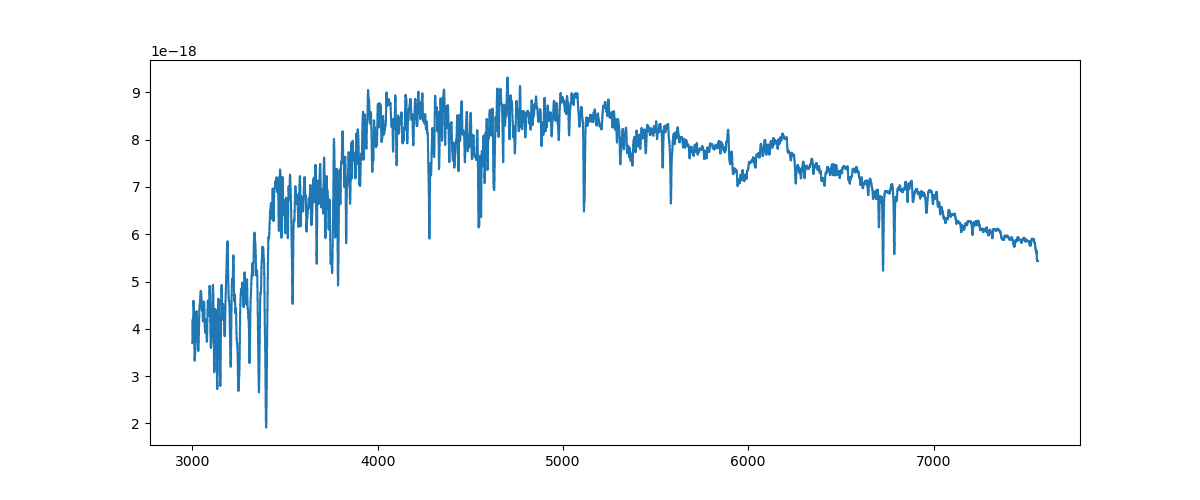

In [24]:
f,ax=plt.subplots(figsize=(12,5))
ax.step(np.arange(3000,3000+len(randomspec)),randomspec)

In [13]:
np.sum(hdul[0].data)

ValueError: I/O operation on closed file